In [10]:
import pandas as pd
import seaborn as sns

In [11]:
spotS = pd.read_csv('spotify_songs.csv', encoding = 'latin-1')
spotS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [12]:
spotify2023 = pd.read_csv('spotify2023.csv', encoding = 'latin-1')

<AxesSubplot:xlabel='track_popularity', ylabel='Count'>

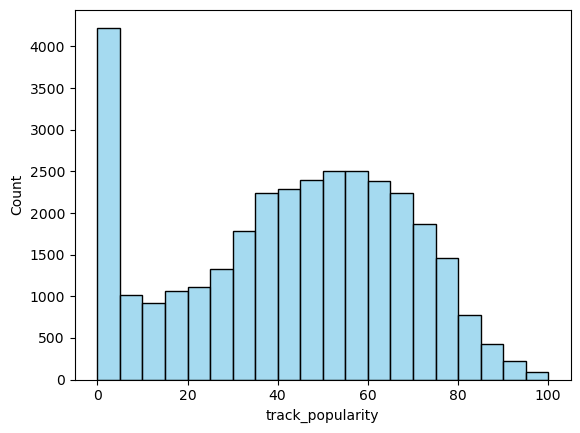

In [13]:
sns.histplot(spotS["track_popularity"], bins = 20, kde=False, color='skyblue')

In [14]:
summary = {
    "Max": spotS["track_popularity"].max(),
    "Q3": spotS["track_popularity"].quantile(0.75),
    "Median": spotS["track_popularity"].median(),
    "Q1": spotS["track_popularity"].quantile(0.25),
    "Min": spotS["track_popularity"].min()
}
summary

{'Max': 100, 'Q3': 62.0, 'Median': 45.0, 'Q1': 24.0, 'Min': 0}

# Track Popularity Distribution
### The median popularity is 45. The mode is between 0 and 5 which means that a lot of songs aren't very popular. Half the songs have a popularity between 24 and 62. The shape of the popularaty distribution is close to a symmetric, normal, bellcurve but there is a lot of data with very low populatity scores as evidenced by the mode.

In [15]:
def avg(col):
    average = 0
    average = col.mean()
    return average


In [16]:
avg(spotS["tempo"])

120.88113154448297

In [17]:
def avg1(col):
    sum = 0
    for value in col:
        sum += value
    sum/len(col)
    return sum
avg1(spotS["tempo"])

3968890.192000009

<AxesSubplot:xlabel='valence_%'>

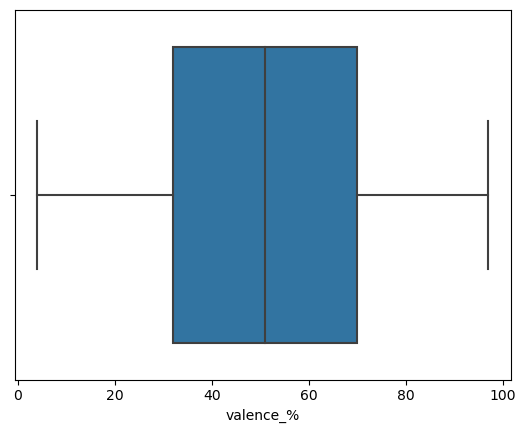

In [18]:
sns.boxplot(data= spotify2023, x= "valence_%")

<AxesSubplot:xlabel='valence_%', ylabel='Count'>

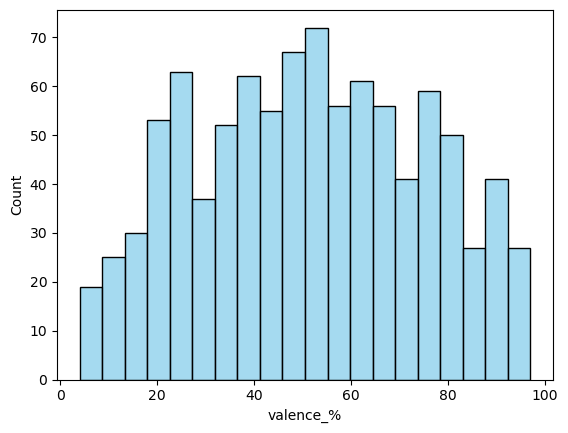

In [19]:
sns.histplot(spotify2023["valence_%"], bins = 20, kde=False, color='skyblue')


<AxesSubplot:xlabel='valence_%'>

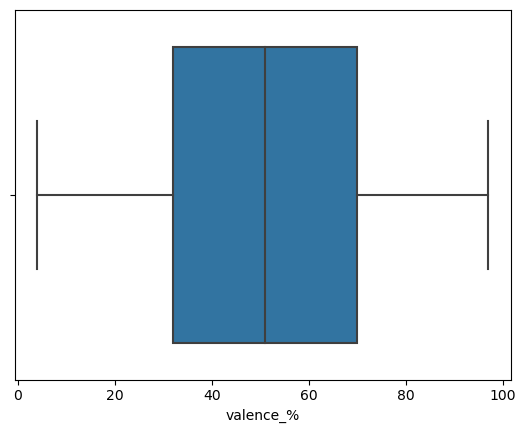

In [20]:
sns.boxplot(data= spotify2023, x="valence_%")

In [21]:
spotS["danceability"].std()

0.14508532044765107

In [22]:
spotify2023["valence_%"].std()

23.480631839891334

In [23]:
def standard_deviation(col):
    std = spotS[col].std()
    return std
standard_deviation("danceability")
    

0.14508532044765107

### A popularity score of 100 is very impressive because the median popularity score is 45 and the upper quartile is only 63. 100 is also the maximum value.

<AxesSubplot:xlabel='loudness', ylabel='Count'>

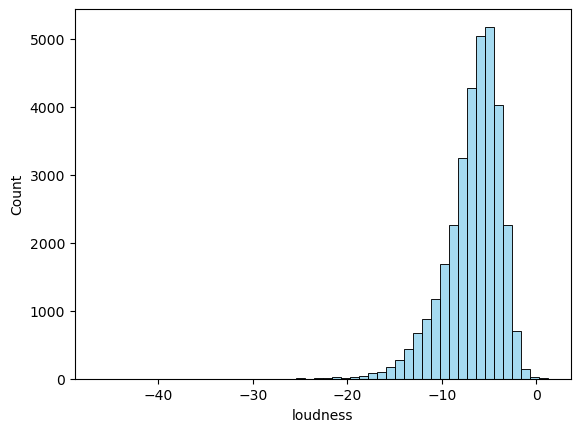

In [24]:
sns.histplot(spotS["loudness"], bins = 50, kde=False, color='skyblue')

## Question: What is the variability in loudness?
### Loundness varies by 2.99 standard deviations. This is relatively low variation.

In [25]:
spotS["loudness"].std()

2.9884363863324013

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

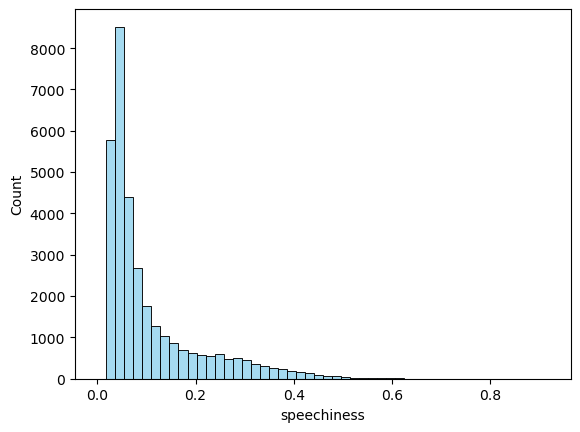

In [26]:
sns.histplot(spotS["speechiness"], bins = 50, kde=False, color='skyblue')

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

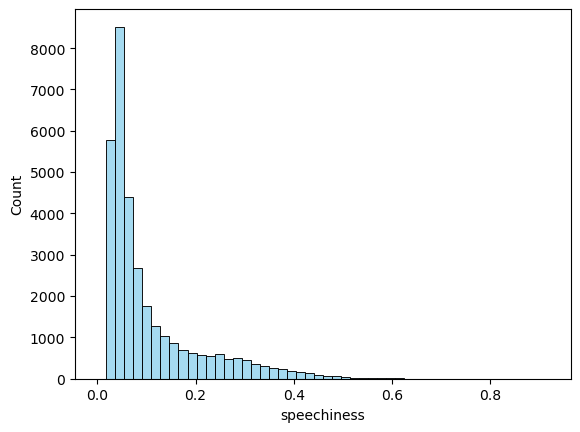

In [27]:
sns.histplot(spotS["speechiness"], bins = 50, kde=False, color='skyblue')

Mean value: 0.07399126566188474


<AxesSubplot:xlabel='speechiness', ylabel='Count'>

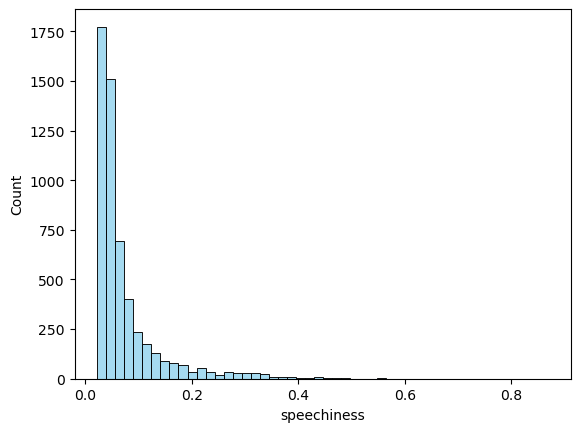

In [28]:
pop = spotS[spotS['playlist_genre'] == 'pop']

# Step 2: Calculate the mean of the 'value' column
mean_value = pop['speechiness'].mean()

print("Mean value:", mean_value)

sns.histplot(pop["speechiness"], bins = 50, kde=False, color='skyblue')

Mean value: 0.1975058823529417


<AxesSubplot:xlabel='speechiness', ylabel='Count'>

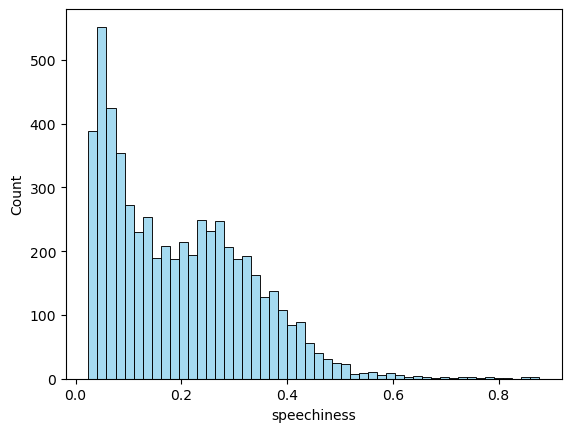

In [29]:
rap = spotS[spotS['playlist_genre'] == 'rap']

# Step 2: Calculate the mean of the 'value' column
mean_value = rap['speechiness'].mean()

print("Mean value:", mean_value)

sns.histplot(rap["speechiness"], bins = 50, kde=False, color='skyblue')

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

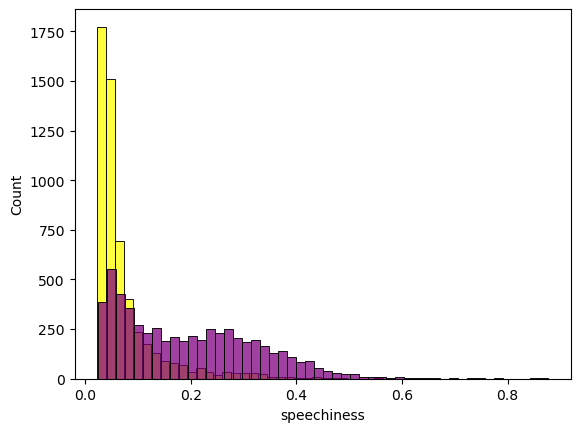

In [30]:
sns.histplot(pop["speechiness"], bins = 50, kde=False, color='yellow')
sns.histplot(rap["speechiness"], bins = 50, kde=False, color='purple')

Mean major: 534832793.33515483
Mean minor: 485944478.91067


<AxesSubplot:xlabel='streams', ylabel='Count'>

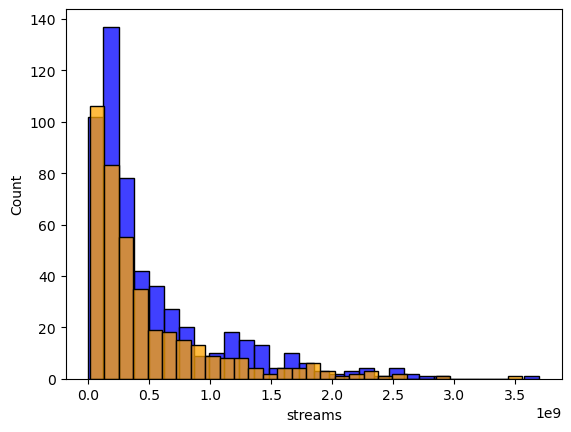

In [31]:
spotify2023["streams"] = spotify2023["streams"].str.replace(',', '')
spotify2023["streams"] = pd.to_numeric(spotify2023["streams"], errors="coerce")

major = spotify2023[spotify2023['mode'] == 'Major']

mean_major = major['streams'].mean()

print("Mean major:", mean_major)

sns.histplot(major["streams"], bins = 30, color='blue')


minor = spotify2023[spotify2023['mode'] == 'Minor']

mean_minor = minor['streams'].mean()

print("Mean minor:", mean_minor)

sns.histplot(minor["streams"], bins = 30, color='orange')